# 1. Import any modules as you need

In [1]:
# !pip install ydata_profiling
from ydata_profiling import ProfileReport

In [1]:
######################### Stats
import pandas as pd
import numpy as np

pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows',999)
pd.set_option('float.format','{:f}'.format)
np.set_printoptions(precision=2)

from scipy.stats import pearsonr
import statsmodels.api as sm
# import statsmodels.formula.api as smf

from scipy.stats.mstats import winsorize

import random
######################### Viz
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

######################### Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

######################### Data Analysis
### Categorical Variables 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
### Discretize Continuous Numerical Variables
# convert numerical values into binary values based on a threshold
# divide continuous features into discrete intervals (bins)
from sklearn.preprocessing import Binarizer, KBinsDiscretizer

### Missing Values
from sklearn.impute import SimpleImputer, KNNImputer

### Scaler - Extreme Values 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

### Transform 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures

### Feature Engineering
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.decomposition import PCA, IncrementalPCA

### Sampling 
from sklearn.model_selection import KFold, StratifiedKFold, LeavePOut, ShuffleSplit, TimeSeriesSplit
from sklearn.model_selection import train_test_split

######################### Modeling 
### Regression 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.svm import LinearSVR, SVR 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor

import lightgbm as lgb
import xgboost as xbg
from catboost import CatBoostRegressor

######################### Metrics
### Regression & Classification 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,\
confusion_matrix, roc_curve, precision_recall_curve, classification_report, roc_auc_score,auc,\
accuracy_score, f1_score, precision_score, recall_score

from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict, GridSearchCV

### Feature Importance
from sklearn.inspection import permutation_importance



# 2. Read input data

In [47]:
df = pd.read_csv(r"interview_train.csv")

df = df.rename(columns={'y':'x16', 'x15':'y'})
# Create the hourly index
hourly_index = pd.date_range(start='2020-01-01', periods=1000, freq='H')
df.index = hourly_index

df.loc[:, 'x17'] = random.choices(["orange","blue","green"], k=len(df))


display(df.head())
display(df.shape)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,y,x16,x17
2020-01-01 00:00:00,49.359178,-21.626783,0.829029,10.305796,14.607746,0.524993,8.373217,1.200000,NaN,25.851422,-0.002612,-10.337725,1.607982,0.550908,0.666995,0,orange
2020-01-01 01:00:00,55.649128,-20.337816,8.870142,7.548730,14.523496,-0.042865,9.662184,1.200000,-2.380146,26.037642,0.216839,-9.582749,-1.438016,0.024510,0.027207,0,blue
2020-01-01 02:00:00,58.116093,-18.346651,9.974673,9.716283,18.677543,NaN,11.653349,1.200000,NaN,26.445252,-0.967697,-8.306297,-2.954746,240.274511,0.441496,0,green
2020-01-01 03:00:00,43.452196,-24.003563,9.772460,11.938981,13.110701,2.222492,5.996437,1.200000,NaN,23.760152,1.282298,-10.742232,-0.439987,1.818539,10.968514,0,green
2020-01-01 04:00:00,56.175669,-19.596168,0.022057,5.993732,13.447700,-1.228364,10.403832,1.200000,0.416888,24.844529,0.253979,-9.019813,0.417531,0.415434,0.248882,0,blue


(1000, 17)

In [48]:
##### time features 
df = df.reset_index().rename(columns={'index':'date'})

df.loc[:,'year'] = df['date'].dt.year.astype(str)
df.loc[:,'quarter'] = df['date'].dt.quarter.astype(str)
df.loc[:,'month'] = df['date'].dt.month.astype(str)
df.loc[:,'day'] = df['date'].dt.day.astype(str)
df.loc[:,'hour'] = df['date'].dt.hour.astype(str)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1000 non-null   datetime64[ns]
 1   x1       1000 non-null   float64       
 2   x2       1000 non-null   float64       
 3   x3       1000 non-null   float64       
 4   x4       1000 non-null   float64       
 5   x5       1000 non-null   float64       
 6   x6       937 non-null    float64       
 7   x7       1000 non-null   float64       
 8   x8       1000 non-null   float64       
 9   x9       265 non-null    float64       
 10  x10      1000 non-null   float64       
 11  x11      1000 non-null   float64       
 12  x12      1000 non-null   float64       
 13  x13      1000 non-null   float64       
 14  x14      1000 non-null   float64       
 15  y        1000 non-null   float64       
 16  x16      1000 non-null   int64         
 17  x17      1000 non-null   object   

## 2.1 Identify Numerical & Categorical Variables

In [4]:
x_cols = df.columns.to_list()
x_cols.remove('y')

categorical_features = df.select_dtypes(include=['object']).columns.tolist()

numerical_features = df.select_dtypes(exclude=['object']).columns.tolist()
numerical_features.remove('y')

print(f'All features: {x_cols}')
print(f'Categorical features: {categorical_features}')
print(f'Numerical features: {numerical_features}')


All features: ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x16', 'x17']
Categorical features: ['x17']
Numerical features: ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x16']


## 2.2 Train Test Split 
Avoid using out of sample information. 

In [5]:
train_ratio = 0.8

X, y = df[x_cols], df['y']
num_observations = X.shape[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=train_ratio)
train = pd.concat([X_train, y_train], axis=1)

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'train shape: {train.shape}')

print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X shape: (1000, 16)
y shape: (1000,)
X_train shape: (800, 16)
y_train shape: (800,)
train shape: (800, 17)
X_test shape: (200, 16)
y_test shape: (200,)


# 3. Investigate data set

In [ ]:
##### basic EDA 
profile = ProfileReport(df=X_train, title="Profiling Report")

profile

## 3.1 Missing Values & Sparsity

In [6]:
##### infinite values 
np.isinf(X_train[numerical_features]).sum().to_frame().T


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x16
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
##### missing values 
pd.isnull(X_train).sum().to_frame().T


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x16,x17
0,0,0,0,0,0,48,0,0,579,0,0,0,0,0,0,0


### 3.1.1 by column

,Missing Pct
x9,72.38%
x6,6.00%
x1,0.00%
x2,0.00%
x3,0.00%
x4,0.00%
x5,0.00%
x7,0.00%
x8,0.00%
x10,0.00%


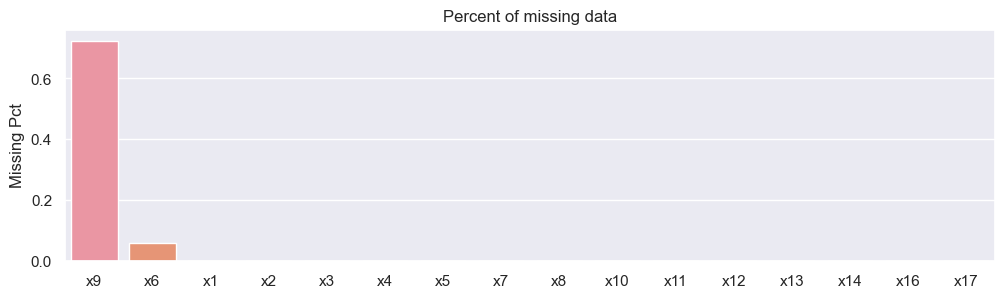

In [8]:
##### viz 
missing_pct = X_train.isnull().sum()/X_train.shape[0]
missing_pct = missing_pct.to_frame().rename(columns={0:'Missing Pct'}).sort_values(by='Missing Pct', ascending=False)#.T.style.format('{:.2%}')

display(missing_pct.style.format('{:.2%}'))

plt.figure(figsize=(12,3))
sns.barplot(x=missing_pct.index, y=missing_pct['Missing Pct'])
# plt.xticks(rotation=45)
plt.title('Percent of missing data')
plt.show();



### 3.1.2 by row

In [9]:
##### rows with large pct of missing values 
def check_sparsity_rows(df, remove_threshold=1):
    remove_row = list(df[df.isnull().mean(axis=1) > remove_threshold].index)
    keep_row = list(df[df.isnull().mean(axis=1) <= remove_threshold].index)

    print(f'Percent of Removed Rows: {len(remove_row)/df.shape[0]:.2%}')
    return keep_row

keep_row = check_sparsity_rows(df=X_train, remove_threshold=0.8)

print("after cleaned shape: ", X_train.loc[keep_row,:].shape)


Percent of Removed Rows: 0.00%
after cleaned shape:  (800, 16)


## 3.2 Features Distribution

In [10]:
quantile = [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]
X_train.describe(quantile).style.format('{:.2f}')

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x16
count,800.00,800.00,800.00,800.00,800.00,752.00,800.00,800.00,221.00,800.00,800.00,800.00,800.00,800.00,800.00
mean,51.48,-20.87,4.49,10.19,15.67,0.02,9.75,1.37,-0.12,25.20,0.05,-9.29,-0.02,18.10,0.20
std,6.08,2.05,3.31,2.49,2.39,1.02,4.09,0.33,1.06,1.02,1.31,1.05,1.84,98.70,0.40
min,26.71,-28.27,0.00,1.62,7.99,-2.95,1.73,1.20,-3.56,22.02,-8.39,-12.78,-11.25,-3.16,0.00
1%,37.84,-25.63,0.01,5.32,10.02,-2.28,4.37,1.20,-2.95,22.77,-3.03,-11.72,-4.43,-2.34,0.00
10%,44.02,-23.50,0.28,6.79,12.66,-1.31,6.58,1.20,-1.24,23.91,-1.41,-10.58,-1.73,-1.24,0.00
25%,47.30,-22.26,1.30,8.43,14.08,-0.70,7.78,1.20,-0.87,24.52,-0.67,-10.03,-0.84,-0.58,0.00
50%,51.48,-20.94,3.85,10.29,15.69,0.04,9.11,1.20,-0.13,25.24,0.00,-9.30,-0.04,0.09,0.00
75%,55.69,-19.43,7.54,11.88,17.29,0.70,10.71,1.20,0.60,25.89,0.72,-8.55,0.77,0.86,0.00
90%,59.15,-18.31,9.33,13.44,18.84,1.30,12.06,2.00,1.25,26.46,1.53,-7.98,1.62,1.64,1.00


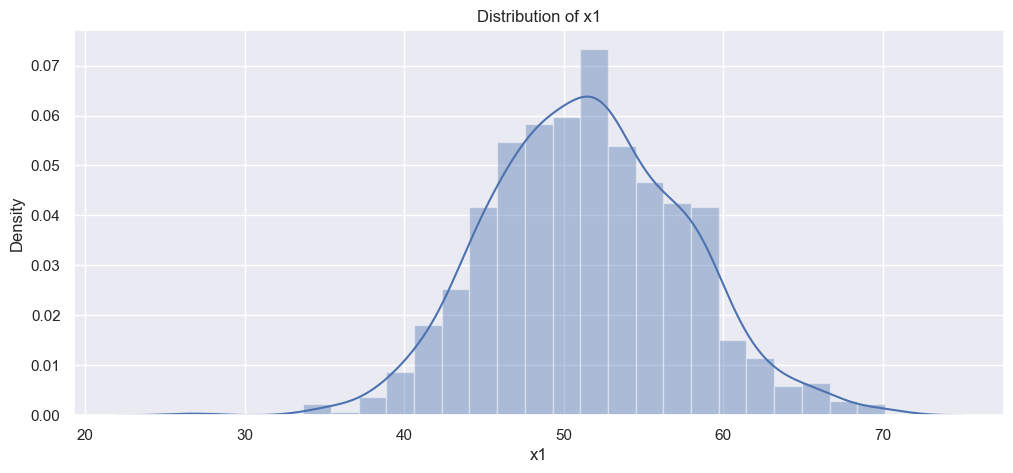

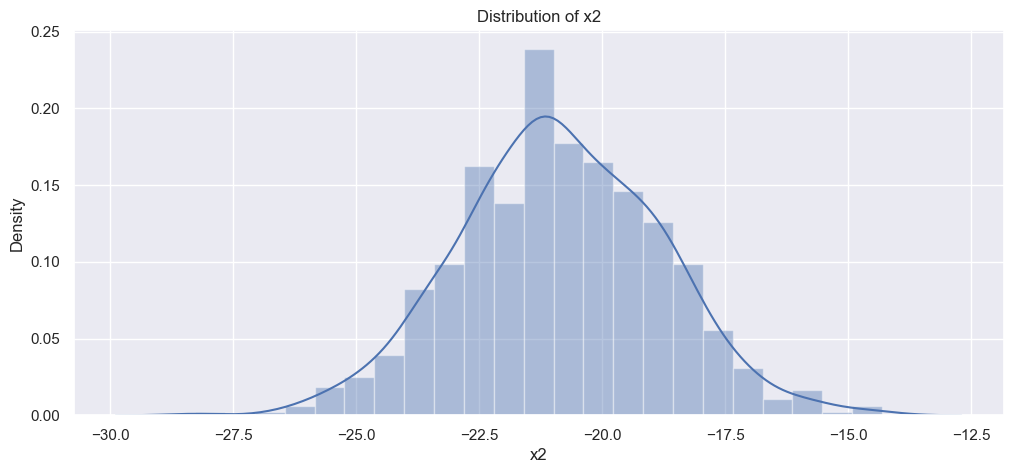

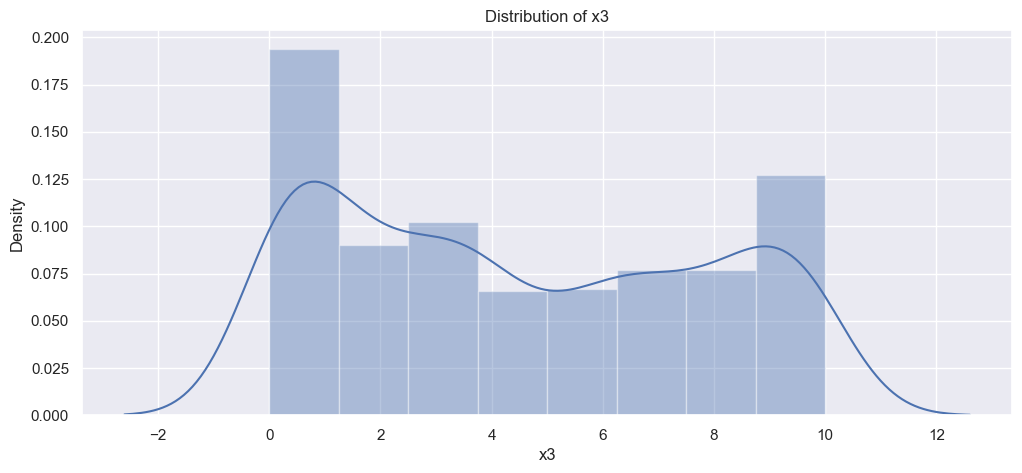

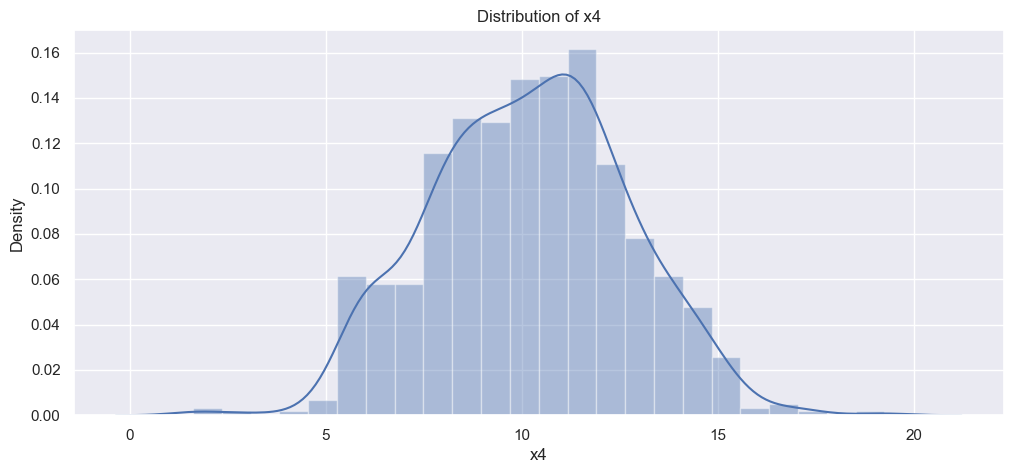

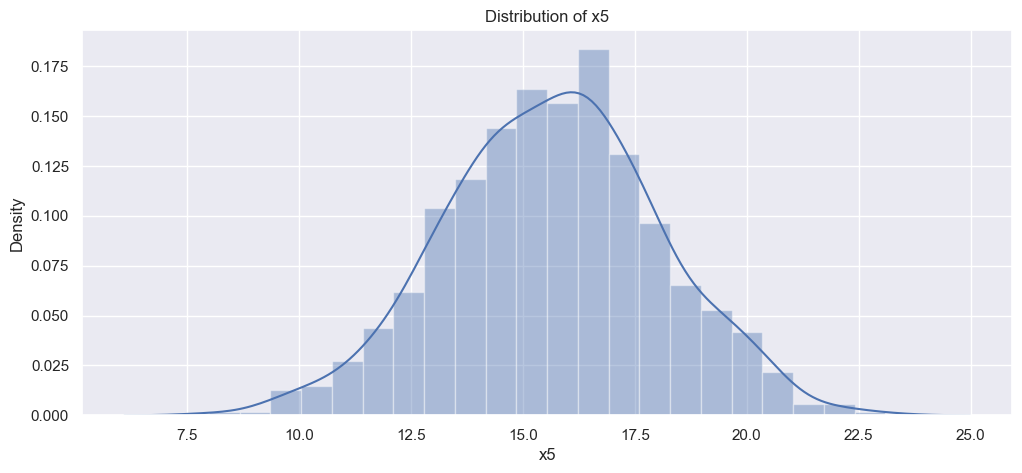

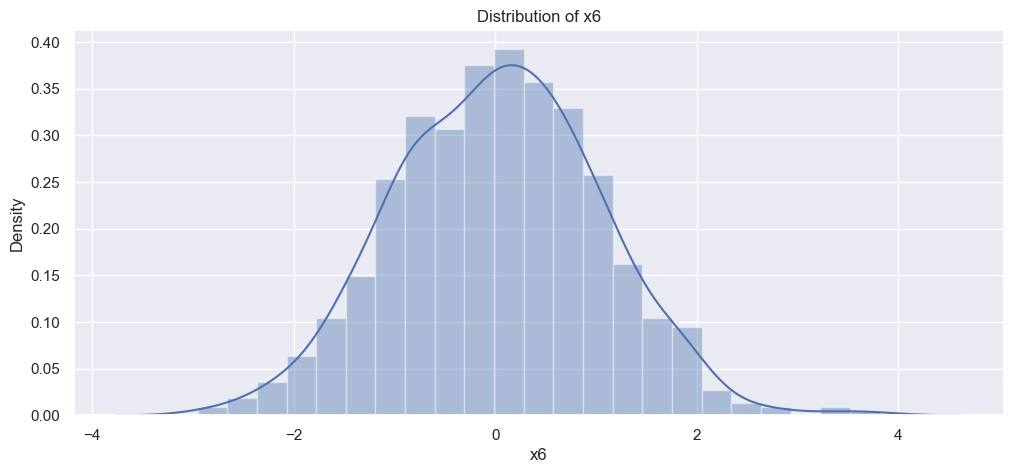

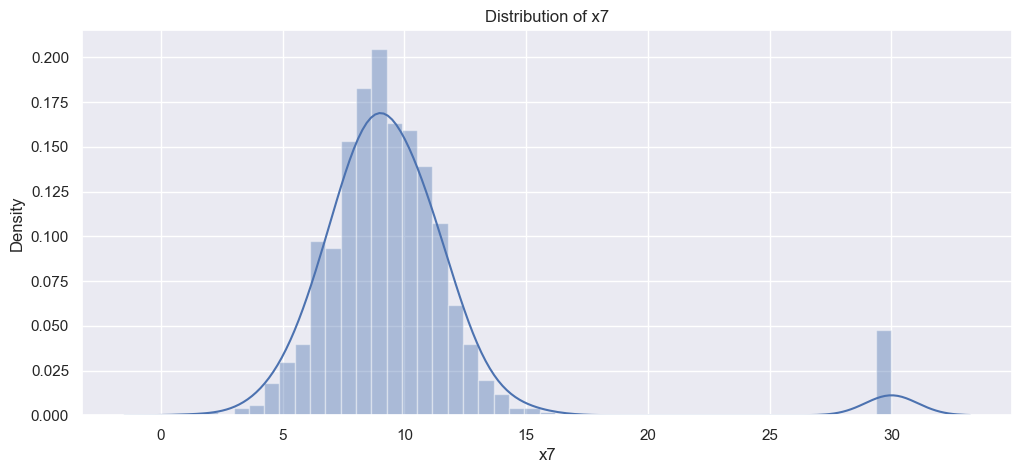

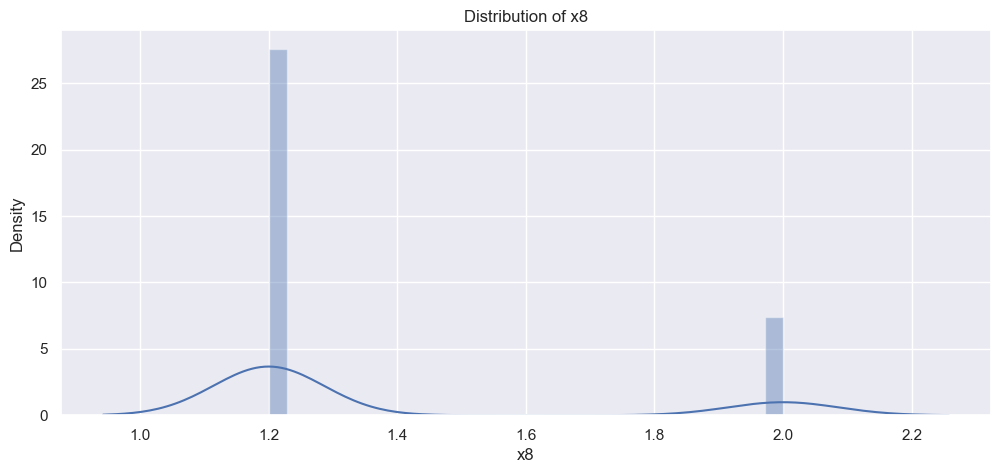

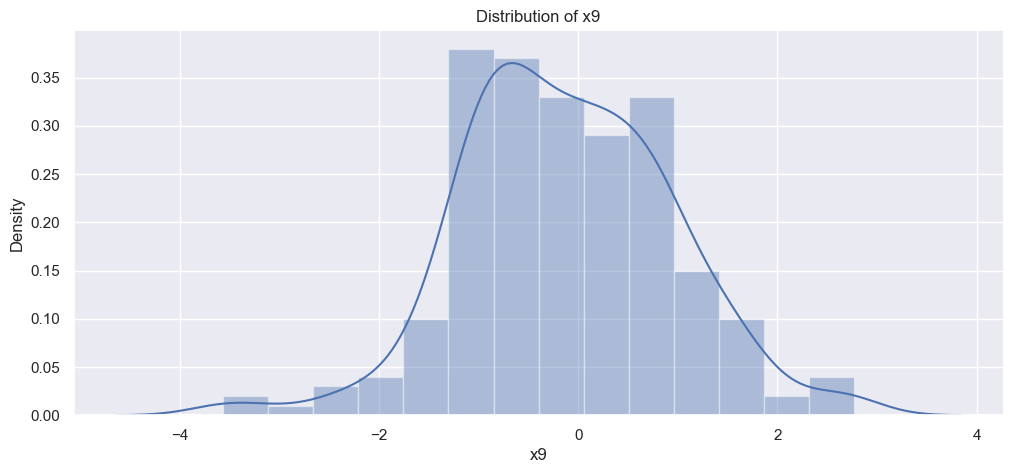

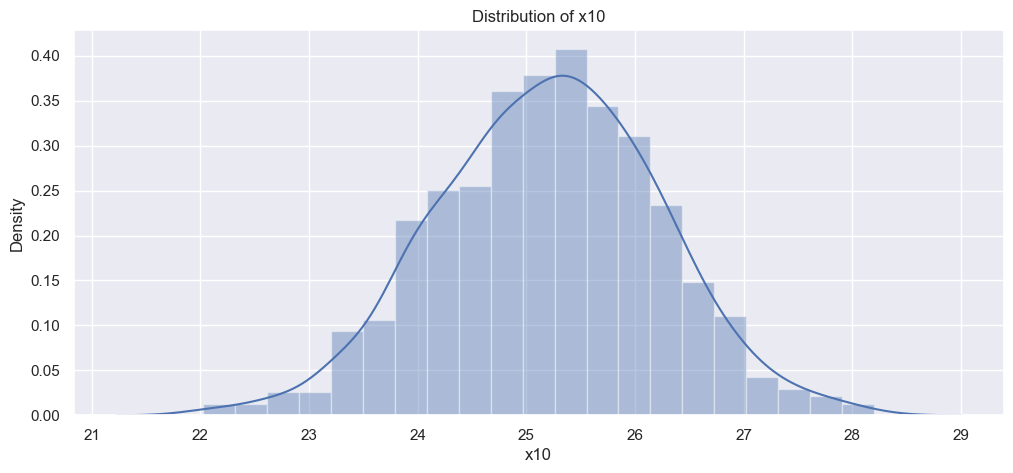

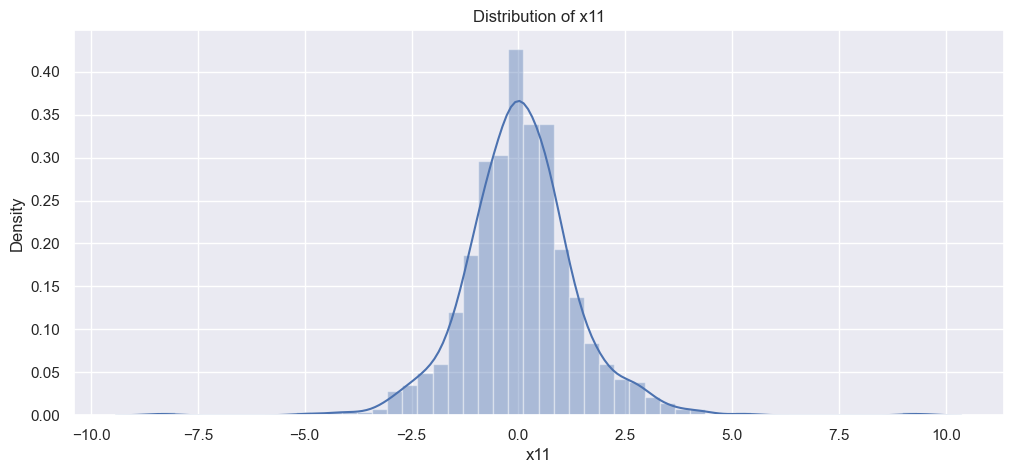

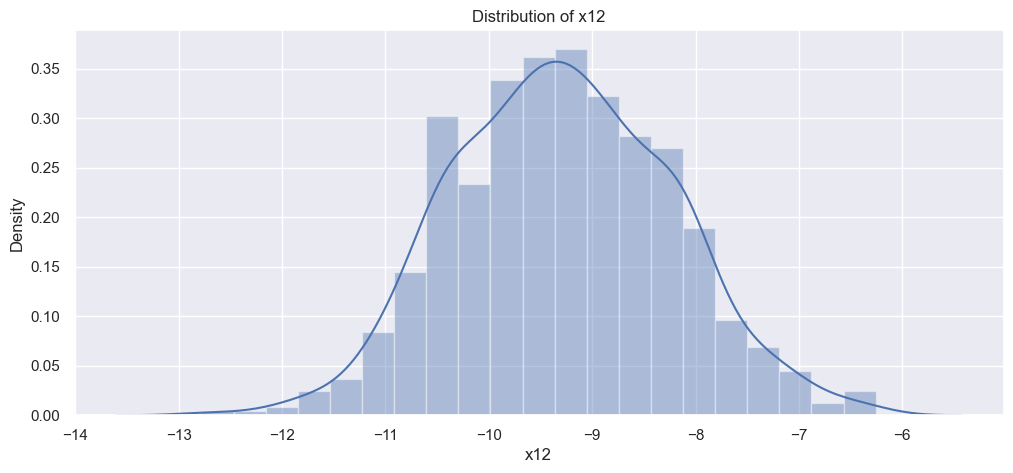

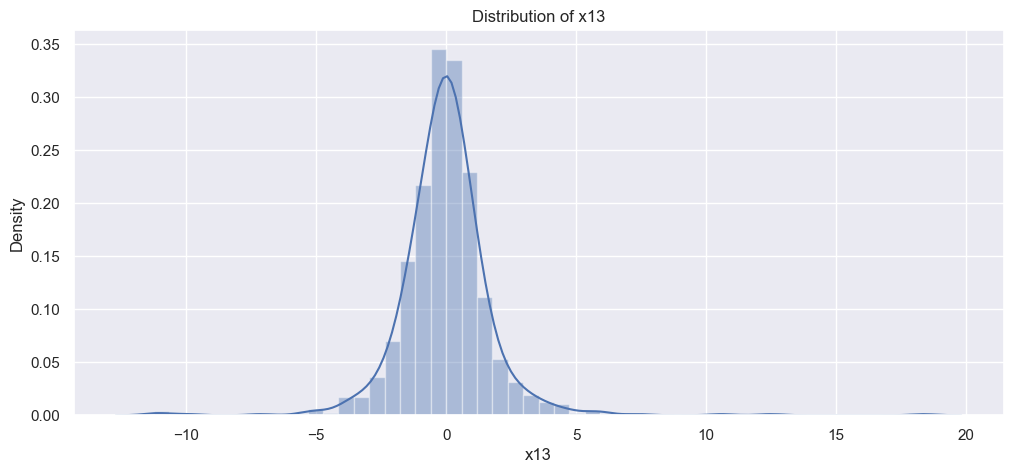

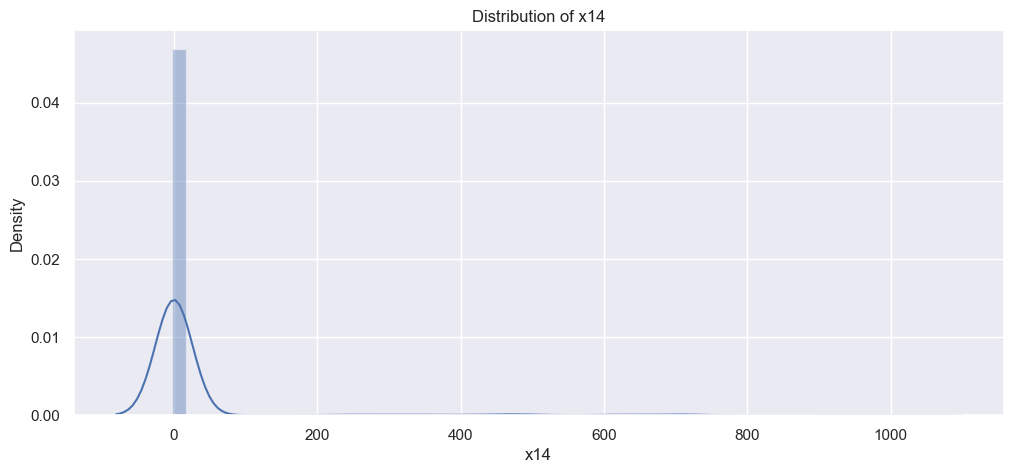

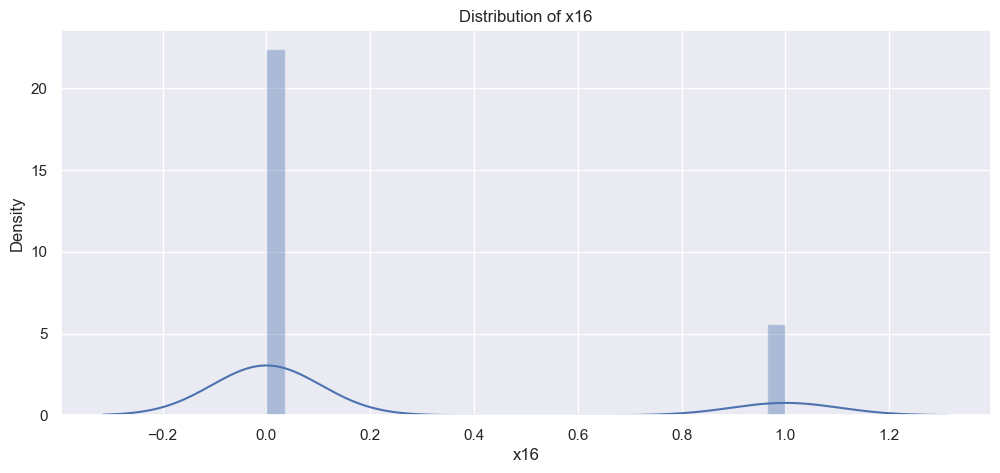

In [11]:
for col in numerical_features:
    plt.figure(figsize=(12,5))
    sns.distplot(X_train[col])
    plt.title(f'Distribution of {col}')
    plt.show();
    

In [12]:
##### basic features preprocessing 
data = train.copy()

##### extreme values & outliers & dist 
data['x7'] = data['x7'].replace(30,np.nan)
data['x14'] = np.sign(data['x14'])*np.log(abs(data['x14']))


##### categorical 
data['x8'] = data['x8'].replace({1.2: 0, 2.0: 1})
data['x8'] = data['x8'].astype(int)

##### missing values 
numerical_features.remove('x9')

data.describe(quantile).style.format('{:.2f}')

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x16,y
count,800.00,800.00,800.00,800.00,800.00,752.00,776.00,800.00,221.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00
mean,51.48,-20.87,4.49,10.19,15.67,0.02,9.13,0.21,-0.12,25.20,0.05,-9.29,-0.02,0.23,0.20,7.69
std,6.08,2.05,3.31,2.49,2.39,1.02,2.04,0.41,1.06,1.02,1.31,1.05,1.84,1.71,0.40,28.78
min,26.71,-28.27,0.00,1.62,7.99,-2.95,1.73,0.00,-3.56,22.02,-8.39,-12.78,-11.25,-6.17,0.00,0.00
1%,37.84,-25.63,0.01,5.32,10.02,-2.28,4.37,0.00,-2.95,22.77,-3.03,-11.72,-4.43,-3.71,0.00,0.01
10%,44.02,-23.50,0.28,6.79,12.66,-1.31,6.53,0.00,-1.24,23.91,-1.41,-10.58,-1.73,-1.32,0.00,0.09
25%,47.30,-22.26,1.30,8.43,14.08,-0.70,7.75,0.00,-0.87,24.52,-0.67,-10.03,-0.84,-0.54,0.00,0.27
50%,51.48,-20.94,3.85,10.29,15.69,0.04,9.06,0.00,-0.13,25.24,0.00,-9.30,-0.04,0.04,0.00,1.03
75%,55.69,-19.43,7.54,11.88,17.29,0.70,10.55,0.00,0.60,25.89,0.72,-8.55,0.77,0.73,0.00,4.09
90%,59.15,-18.31,9.33,13.44,18.84,1.30,11.68,1.00,1.25,26.46,1.53,-7.98,1.62,1.82,1.00,15.36


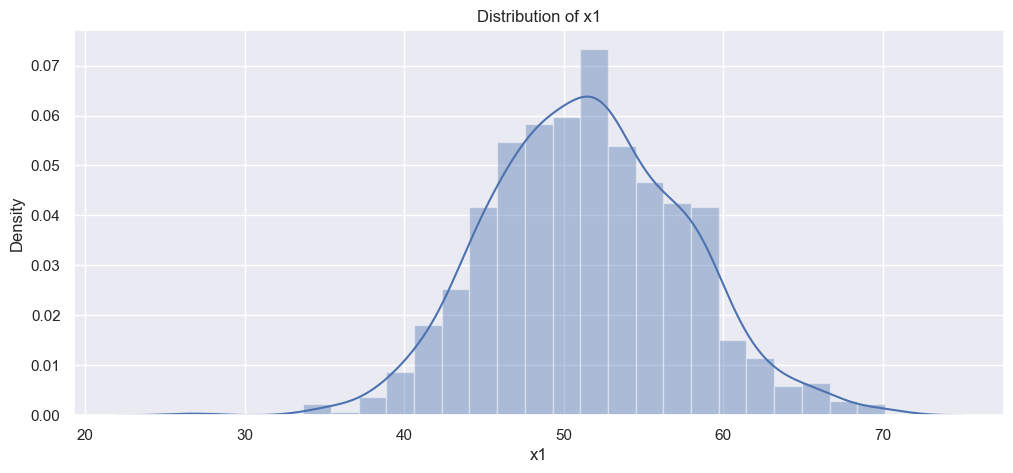

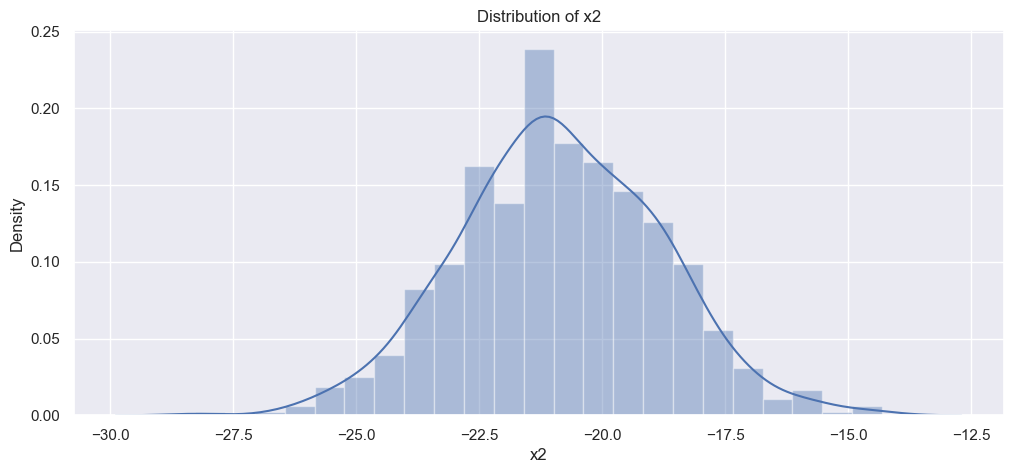

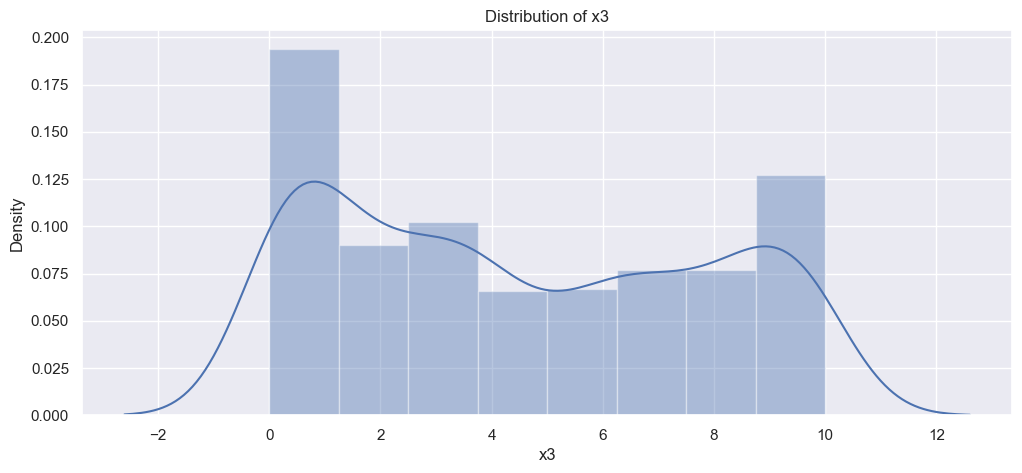

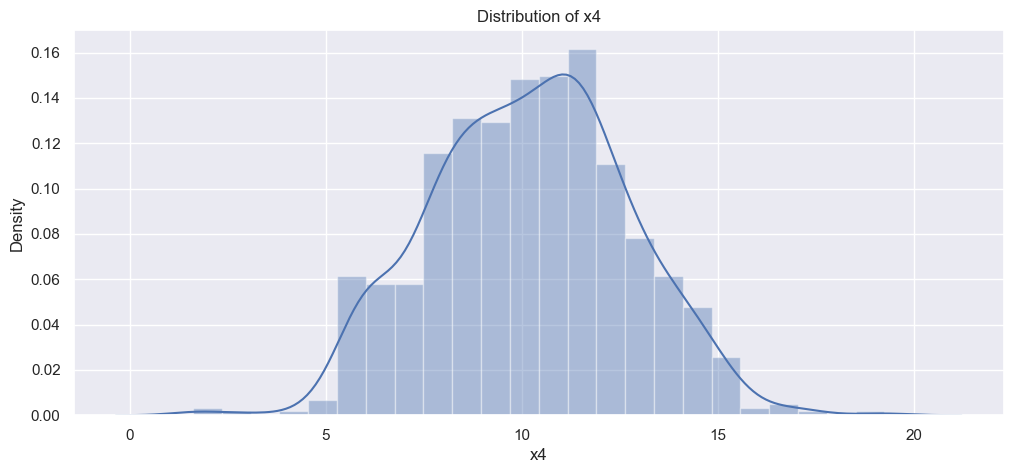

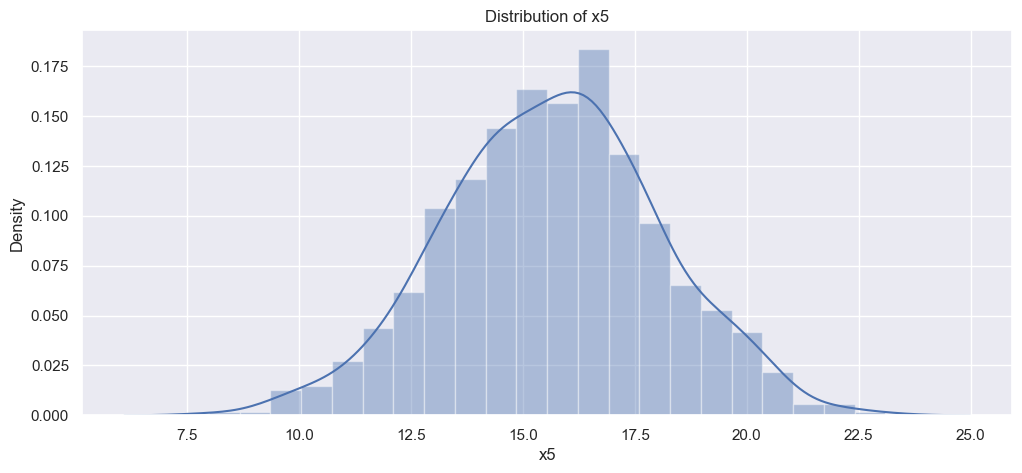

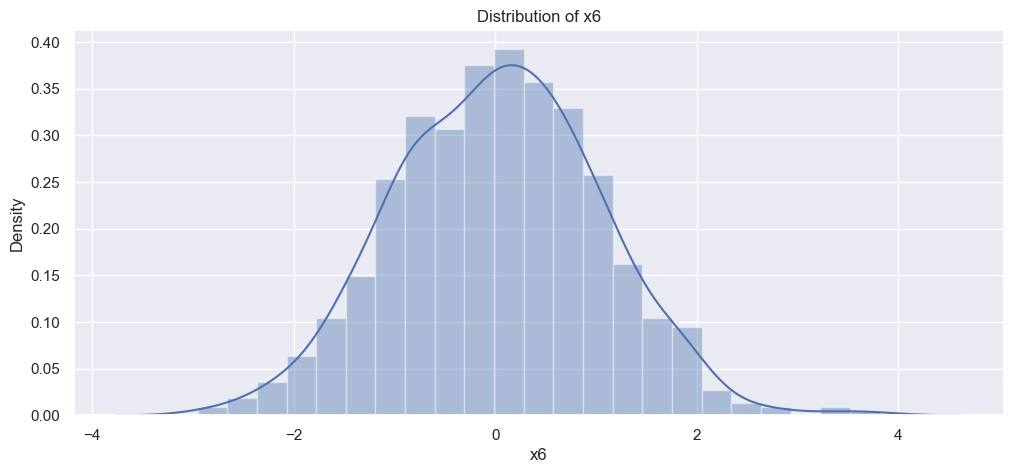

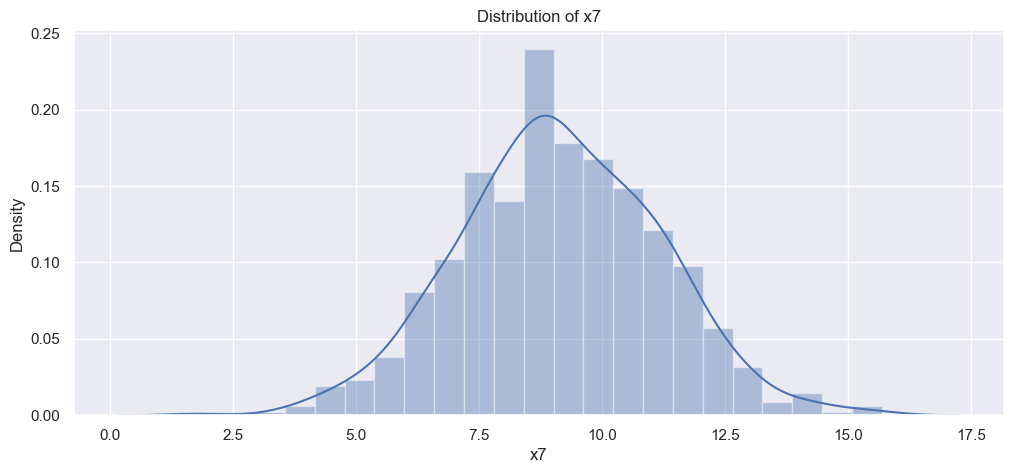

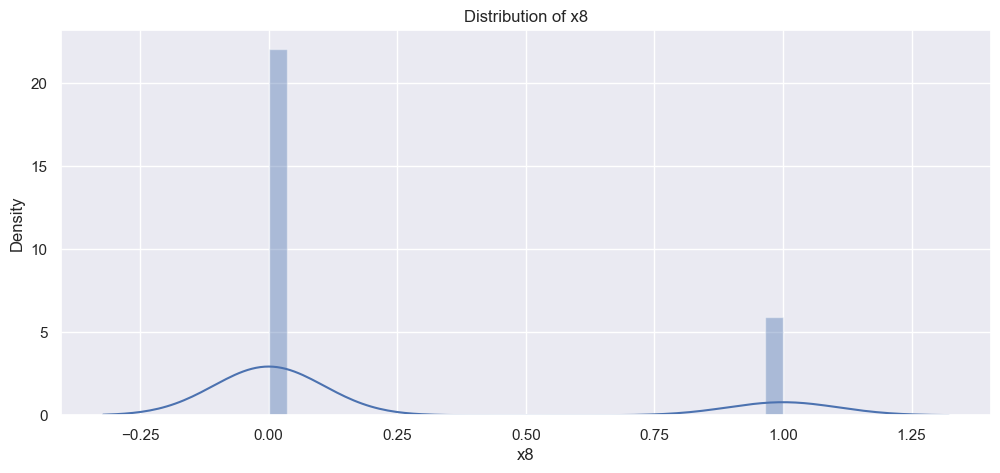

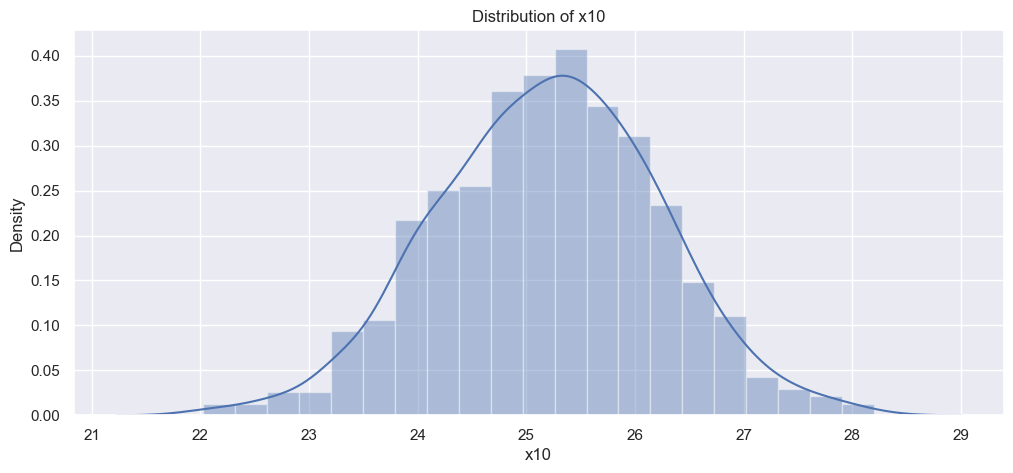

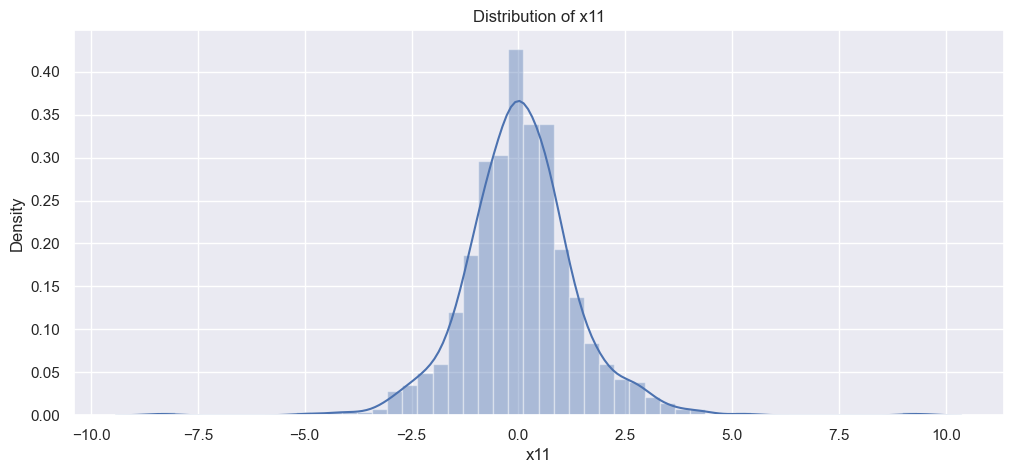

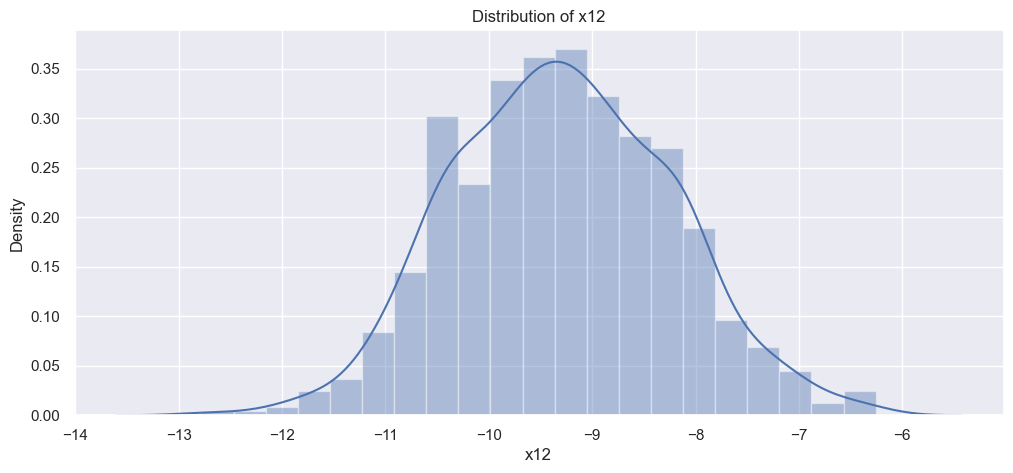

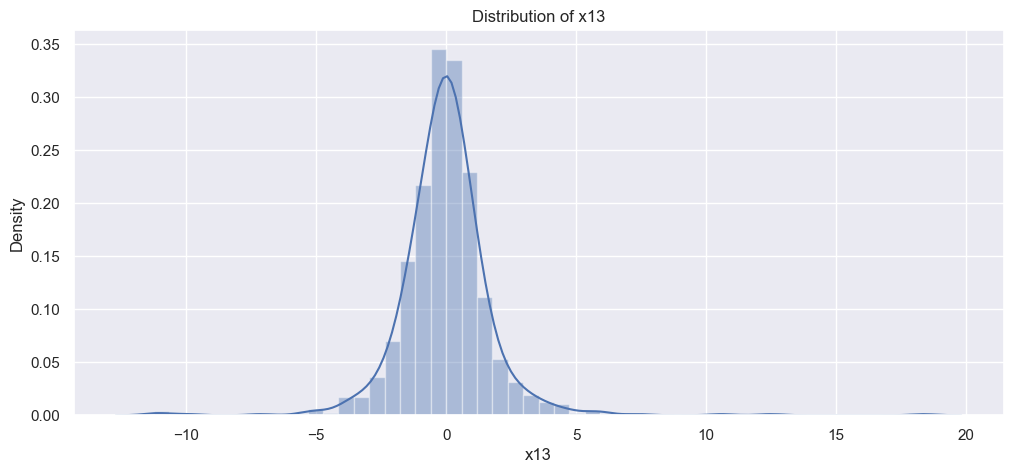

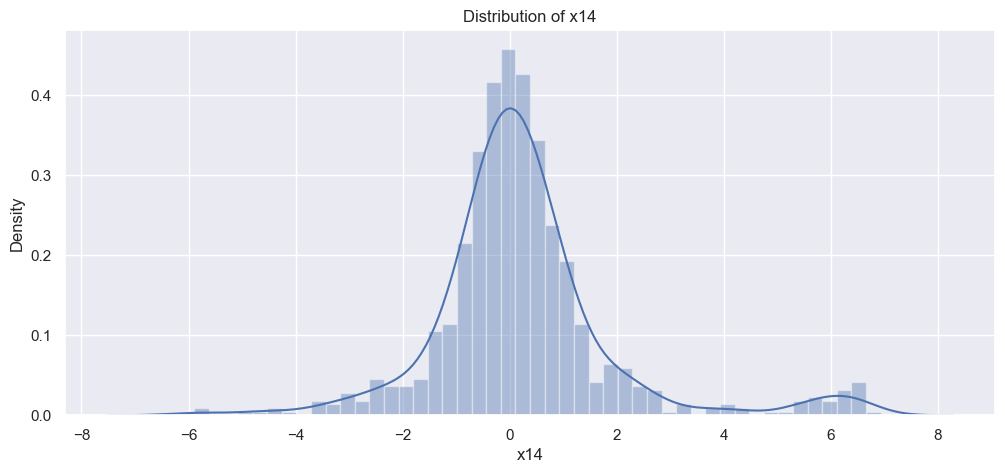

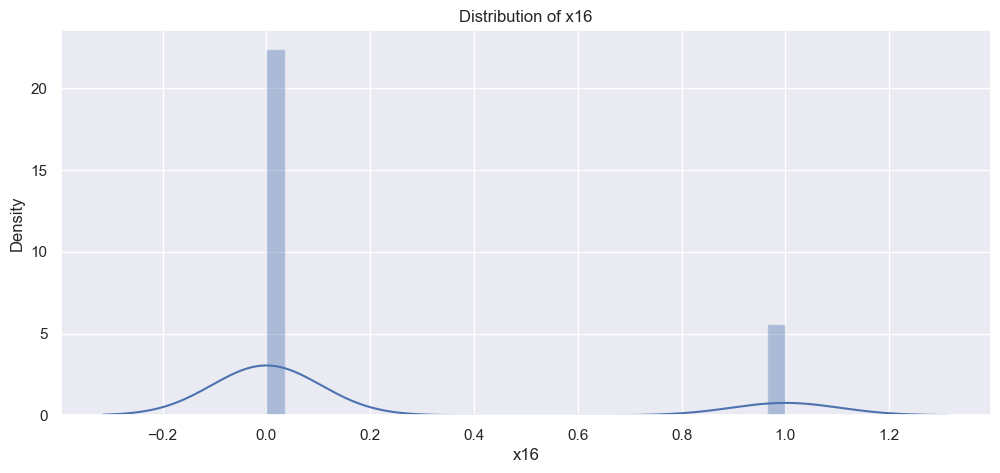

In [13]:
for col in numerical_features:
    plt.figure(figsize=(12,5))
    sns.distplot(data[col])
    plt.title(f'Distribution of {col}')
    plt.show();

## 3.3 Extreme Values

### 3.3.1 Scaler 

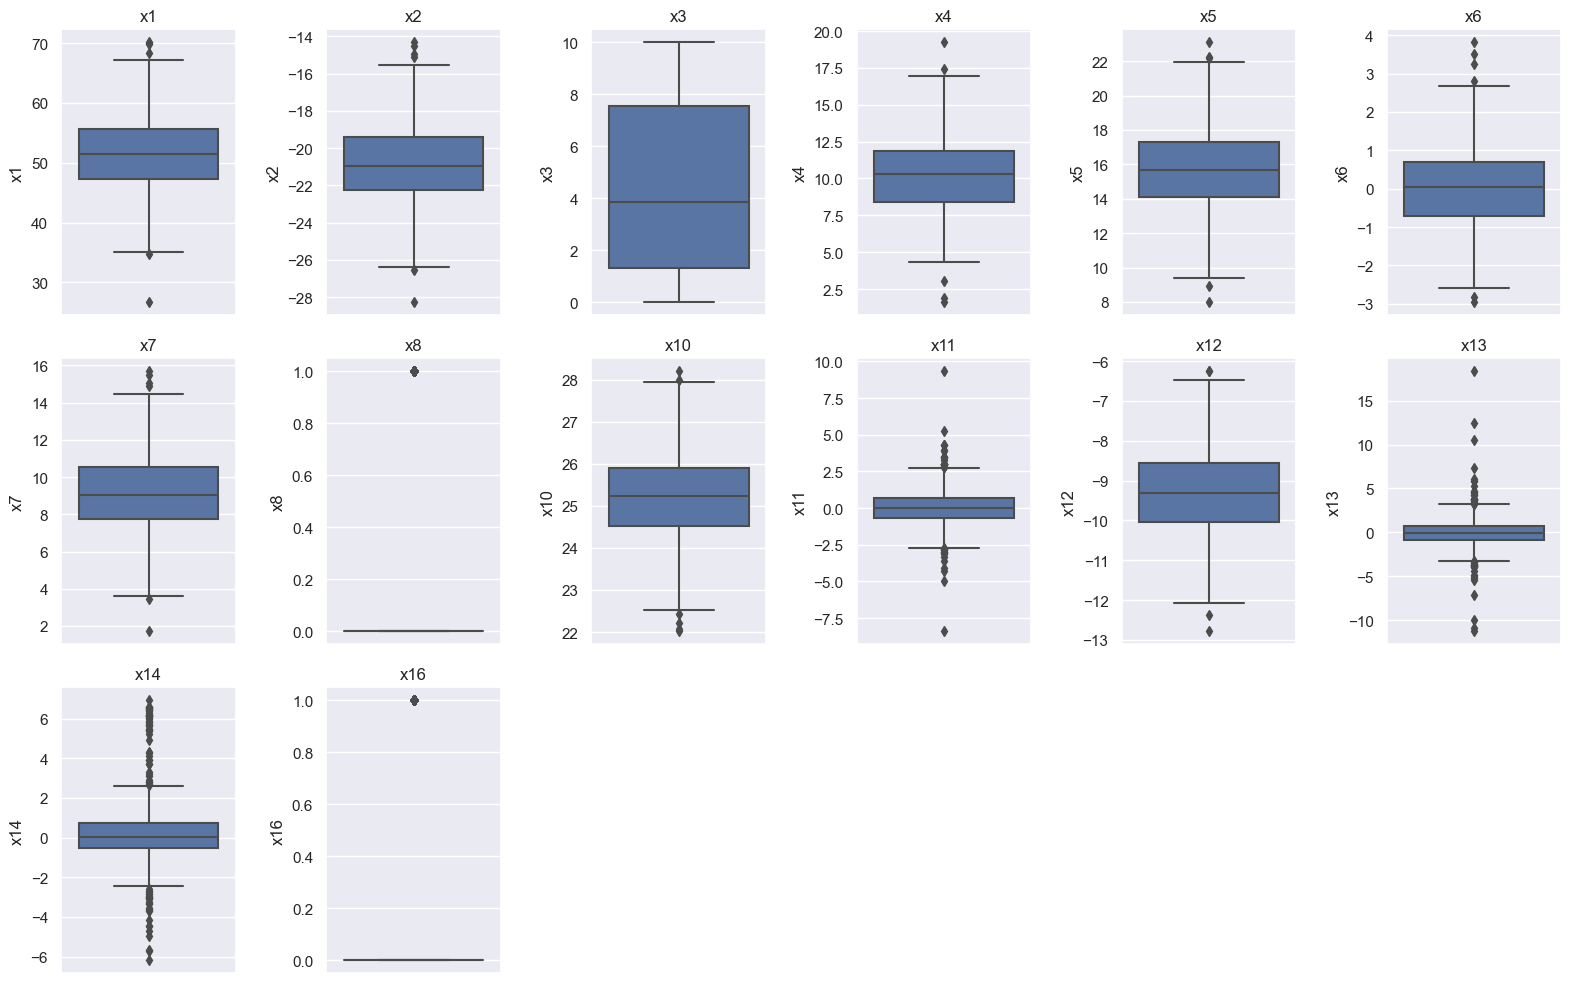

In [14]:
plt.figure(figsize=(16,10))

for i, col in enumerate(numerical_features):    
    plt.subplot(3,6,i + 1)
    sns.boxplot(y=col, data=data)
    plt.title(col)

plt.tight_layout()
plt.show();

### 3.3.2 Sense the number 

In [88]:
# value_interval = {
#     'x1': [0, float('inf')], 
#     'x2': [0, float('inf')], 
#     'x3': [0, float('inf')], 
#     'x4': [0, float('inf')], 
#     'x5': [0, float('inf')], 
# }

# value_interval = dict(zip(numerical_features, len(numerical_features)*[[0,float('inf')]]))

# for col in numerical_features:
#     lower_bound, upper_bound = value_interval[col]
#     min_val, max_val = min(data[col]), max(data[col])
#     if min_val < lower_bound:
#         print(f'{col}: lower_bound={lower_bound}, min_val={min_val}')
#     if max_val > upper_bound:
#         print(f'{col}: upper_bound={upper_bound}, max_val={max_val}')

        
# ##### imputation & winsorization 
# for col in numeric_features:
#     lower_bound, upper_bound = value_interval[col]
#     data[col][data[col]<lower_bound] = np.nan
#     data[col][data[col]>upper_bound] = np.nan
    
#     X_test[col][X_test[col]<lower_bound] = np.nan
#     X_test[col][X_test[col]>upper_bound] = np.nan

x2: lower_bound=0, min_val=-28.2724356575774
x6: lower_bound=0, min_val=-2.95331098643496
x11: lower_bound=0, min_val=-8.38501015534955
x12: lower_bound=0, min_val=-12.779049122301
x13: lower_bound=0, min_val=-11.2528858867734
x14: lower_bound=0, min_val=-5.650072005950712


In [5]:
class Winsorize(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()
        self.med_ = None
        self.mad_ = None

    def fit(self, X, y=None):
        self.med_ = np.mean(X, axis=0)        
        self.mad_ = np.median(np.abs(X - self.med_), axis=0)

        return self

    def transform(self, X, y=None):
        col_len = X.shape[1]
        for i in range(col_len):
            val = X[:,i]
            X[:,i][val>self.med_[i]+2*self.mad_[i]] = self.med_[i] + 2*self.mad_[i]
            X[:,i][val<self.med_[i]-2*self.mad_[i]] = self.med_[i] - 2*self.mad_[i]        

        return X

## 3.4 Linear relationship

In [16]:
data[numerical_features].corr().style.format('{:.2f}')

,x1,x2,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x14,x16
x1,1.00,0.88,-0.00,-0.63,0.56,0.04,0.88,0.02,0.80,-0.04,0.78,-0.02,0.01,0.31
x2,0.88,1.00,0.00,-0.58,0.58,0.02,1.00,0.01,0.84,-0.05,0.91,-0.02,0.03,0.35
x3,-0.00,0.00,1.00,-0.02,-0.02,-0.00,-0.01,0.03,0.04,0.03,0.01,-0.03,-0.00,-0.01
x4,-0.63,-0.58,-0.02,1.00,0.26,-0.03,-0.58,-0.05,-0.55,0.02,-0.56,0.05,0.05,-0.16
x5,0.56,0.58,-0.02,0.26,1.00,0.01,0.58,-0.03,0.47,-0.04,0.49,0.03,0.07,0.25
x6,0.04,0.02,-0.00,-0.03,0.01,1.00,0.02,0.05,-0.01,-0.04,0.04,0.01,-0.07,0.09
x7,0.88,1.00,-0.01,-0.58,0.58,0.02,1.00,0.01,0.84,-0.05,0.90,-0.02,0.03,0.34
x8,0.02,0.01,0.03,-0.05,-0.03,0.05,0.01,1.00,0.01,0.01,0.02,0.01,-0.04,0.00
x10,0.80,0.84,0.04,-0.55,0.47,-0.01,0.84,0.01,1.00,-0.03,0.69,-0.03,-0.01,0.22
x11,-0.04,-0.05,0.03,0.02,-0.04,-0.04,-0.05,0.01,-0.03,1.00,-0.03,-0.05,0.02,-0.01


,x11,x6,x8,x1,x10,x5,x13,x14,x12,x7,x4,x2,x3,x16
y,-0.05,-0.05,-0.02,-0.02,-0.02,-0.01,-0.01,-0.00,0.00,0.00,0.00,0.00,0.04,0.22


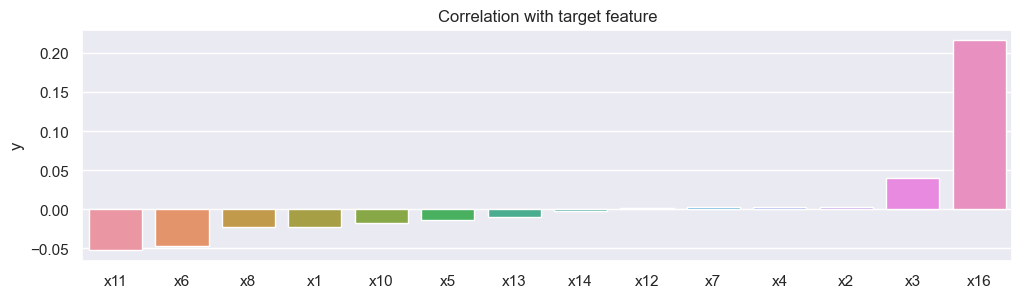

In [17]:
target_variable = 'y'
correlation_matrix = data[numerical_features+['y']].corr()
target_correlation = correlation_matrix[target_variable].drop(target_variable).to_frame().sort_values(by=target_variable)

display(target_correlation.T.style.format('{:.2f}'))

plt.figure(figsize=(12,3))
sns.barplot(x=target_correlation.index, y=target_correlation[target_variable])
# plt.xticks(rotation=45)
plt.title('Correlation with target feature')
plt.show();

## 3.5 PCA

In [6]:
def PCA_factors(df, limit=5):
    ##### data cleaning 
    imputer = SimpleImputer(strategy='mean')
    df_imputed = df.copy()
    df_imputed.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_imputed = imputer.fit_transform(df_imputed)
    
    ##### PCA factors 
    pca = PCA()
    X_pca = pca.fit_transform(df_imputed)
    n_components = len(pca.explained_variance_ratio_)
    explained_variance = pca.explained_variance_ratio_
    cum_explained_variance = np.cumsum(explained_variance)
    idx = np.arange(n_components)+1
    df_explained_variance = pd.DataFrame([explained_variance, cum_explained_variance], 
                                         index=['explained variance', 'cumulative'], 
                                         columns=idx).T
    mean_explained_variance = df_explained_variance.iloc[:,0].mean()  
    print('PCA Overview')
    print('='*40)
    print("Total: {} components".format(n_components))
    print('-'*40)
    print('Mean explained variance:', round(mean_explained_variance,3))
    print('-'*40)
    print(df_explained_variance.head(20))
    print('-'*40)
        
    ##### explaining power 
    df_explained_variance_limited = df_explained_variance.iloc[:limit,:]
    #make scree plot
    fig, ax1 = plt.subplots(figsize=(15,6))
    ax1.set_title('Explained variance across principal components', fontsize=14)
    ax1.set_xlabel('Principal component', fontsize=12)
    ax1.set_ylabel('Explained variance', fontsize=12)
    ax2 = sns.barplot(x=idx[:limit], y='explained variance', data=df_explained_variance_limited, palette='summer')
    ax2 = ax1.twinx()
    ax2.grid(False)
    ax2.set_ylabel('Cumulative', fontsize=14)
    ax2 = sns.lineplot(x=idx[:limit]-1, y='cumulative', data=df_explained_variance_limited, color='#fc8d59')
    ax1.axhline(mean_explained_variance, ls='--', color='#fc8d59') #plot mean
    ax1.text(-.8, mean_explained_variance+(mean_explained_variance*.05), "average", color='#fc8d59', fontsize=14) #label y axis
    max_y1 = max(df_explained_variance_limited.iloc[:,0])
    max_y2 = max(df_explained_variance_limited.iloc[:,1])
    ax1.set(ylim=(0, max_y1+max_y1*.1))
    ax2.set(ylim=(0, max_y2+max_y2*.1))
    plt.show()
    
    loadings = pca.components_.T[:, :3]  # Only take the first 3 components
    
    ##### PC factors 
    pca = PCA(n_components=limit)
    principalComponents = pca.fit_transform(df_imputed)
    principalDf = pd.DataFrame(data=principalComponents, columns=[f'PC{i+1}' for i in range(limit)], index=df.index)
    
    # keep the same index for concat  
    return pd.concat([df, principalDf], axis=1)


PCA Overview
Total: 7 components
----------------------------------------
Mean explained variance: 0.143
----------------------------------------
   explained variance  cumulative
1            0.833047    0.833047
2            0.126795    0.959842
3            0.030787    0.990629
4            0.005481    0.996110
5            0.002809    0.998919
6            0.001081    1.000000
7            0.000000    1.000000
----------------------------------------


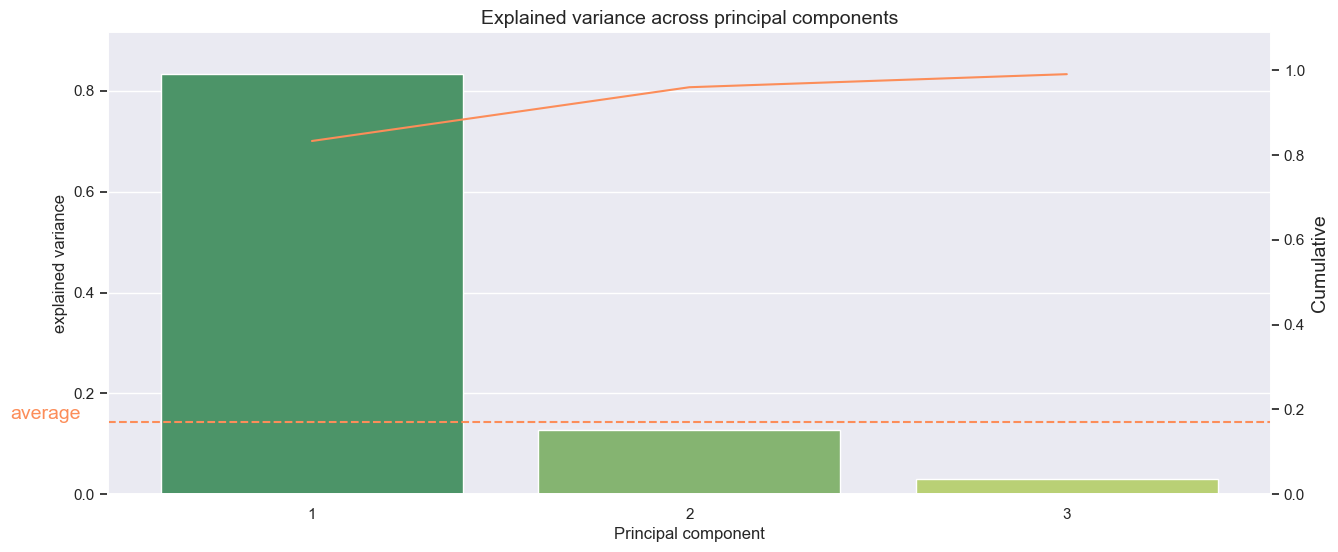

(800, 10)

,x1,x10,x12,x2,x4,x5,x7,PC1,PC2,PC3
2020-01-02 17:00:00,49.590456,25.306053,-8.808147,-21.027984,10.452127,15.406234,8.972016,1.744994,-0.017611,-0.811501
2020-01-01 21:00:00,51.108253,26.043339,-9.072574,-19.365927,7.730805,13.838297,10.634073,-0.811417,-2.905952,-2.281563
2020-02-07 21:00:00,39.227226,23.190498,-11.844927,-25.807633,11.517582,10.282066,4.192367,15.059783,-3.304683,1.544071
2020-01-04 09:00:00,50.122933,24.916023,-9.583501,-20.913287,9.193524,14.114307,9.086713,1.333086,-1.808593,-0.473427
2020-01-09 01:00:00,51.713503,25.625708,-9.464340,-21.153993,8.541288,13.950033,8.846007,-0.125320,-2.404072,0.311448


In [19]:
##### PCA analysis
factors_PCA = PCA_factors(data[['x1', 'x10', 'x12', 'x2', 'x4', 'x5', 'x7']], limit=3)
display(factors_PCA.shape)
display(factors_PCA.head())

# comment cell

The given dataset has 15 features and 1 target variable. 

##### extreme values & outliers & dist 
1. [] are right-skewed, I decided to perform a log transform to better fit the bell-shape distribution assumption. 
2. [] has one extreme value, which is significantly larger than all other values, so I decided to treat it as a data outlier and replaced as nan.[] has some noticeble extreme values. 
3. I decided to use winsorize or robust scaler to scale all features. 

##### categorical 
1. [] is a categorical data, I decided to replace the values with 0 and 1. 
2. [] is categorical data, I decided to use onhot encoder. 

##### missing values 
1. by column:  
- [] has [] missing values, I decided to drop this variable. 
- [] has [] missing values, which is acceptable. 
- I decided to use sample median to replace missing values, there are other ways like, mean, most frequent values, etc.. 
2. by row: 
- Sparcity issue for rows is not significant, so I decided to keep all rows.

##### linear relationship
1. [] are highly correlated. I decided to perform a PCA to deal with the colinearity issue. I choice [] components as the explaining power is good. 
2. [] features has good linear relationship with y. (abs corr bigger than [])


# 4. Process data set

## 4.1 systematic data preprocessing

In [6]:
# clean/process the data based on observed patterns 

def data_processing(df, corr_cols = ['x1', 'x10', 'x12', 'x2', 'x4', 'x5', 'x7'], comp=3, imputer=None, pca=None):
    df = df.copy()
    
    ##### extreme values & dist  
    df['x7'] = df['x7'].replace(30,np.nan)
    df['x14'] = np.sign(df['x14'])*np.log(abs(df['x14']))
#     df['x15'] = np.log(df['x15'])

    ##### categorical variables 
    df['x8'] = df['x8'].replace({1.2: 0, 2.0: 1})

    ##### PCA
    if imputer:
        df[corr_cols] = imputer.transform(df[corr_cols])
    else:
        imputer = SimpleImputer(strategy='mean')
        df[corr_cols] = imputer.fit_transform(df[corr_cols])

    if pca:
        principalComponents = pca.transform(df[corr_cols])
    else:        
        pca = PCA(n_components=comp)
        principalComponents = pca.fit_transform(df[corr_cols])
        
    principalDf = pd.DataFrame(data=principalComponents, columns=[f'PC{i+1}' for i in range(comp)], index=df.index)
    
    df = pd.concat([df, principalDf], axis=1)
    
    return df, imputer, pca



In [7]:
##### preprocess training data 
X_train, imputer_train, pca_train = data_processing(df = X_train, corr_cols = ['x1', 'x10', 'x12', 'x2', 'x4', 'x5', 'x7'], comp=3)

display(X_train.head())
display(f'X_train shape after preprocessing: {X_train.shape}')

numerical_features = ['x3', 'x6', 'x8','x11','x13', 'x14', 'x16', 'PC1', 'PC2', 'PC3']


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x16,x17,PC1,PC2,PC3
2020-01-24 18:00:00,59.866920,-19.183402,3.567527,6.533082,15.419424,-1.999481,10.816598,1.000000,-1.154915,25.861368,-0.971279,-8.992613,-2.010994,0.557894,0,orange,8.794058,-2.612339,1.369568
2020-02-02 12:00:00,61.145107,-17.257559,8.738253,6.242713,16.691057,0.089316,12.742441,0.000000,NaN,26.753695,-0.293638,-7.927705,0.122754,0.253060,0,green,11.477224,-1.772135,-0.805525
2020-01-14 02:00:00,47.782890,-22.704463,8.980061,12.314882,15.667828,-1.847504,7.295537,0.000000,NaN,24.912108,0.799253,-10.052112,0.275549,-1.077012,0,orange,-4.933955,1.496522,0.978474
2020-02-06 21:00:00,56.066972,-19.343609,0.651851,9.340323,17.176298,1.511678,10.656391,0.000000,NaN,26.544630,-0.945859,-8.610286,-0.368675,1.214274,0,blue,5.310052,0.643298,-0.177836
2020-02-01 19:00:00,54.513115,-20.566004,2.597171,7.754515,14.242706,-0.504126,9.433996,0.000000,0.148244,25.336468,-0.827417,-9.456691,0.014616,0.749902,0,blue,2.827536,-2.631173,0.907203


'X_train shape after preprocessing: (800, 19)'

## 4.2 build pipeline

In [8]:
numerical_transformer = Pipeline(steps=[   
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
#     ('imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)),
#     ('winsorize', Winsorize()),
    ('scale', RobustScaler()),
])

# StandardScaler centers around the mean, scaling by variance, 
# whereas RobustScaler centers around the median and scales by the IQR.

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features),         
    ]
)

##### evaluation - array 
X_train_trans = preprocessor.fit_transform(X_train[numerical_features+categorical_features])
X_train_trans.shape

(800, 13)

## 4.3 Cross-Validation framework

In [9]:
def run_model(model_pipleline, X, y, metrics = ['accuracy', 'f1', 'precision', 'recall']):
    # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    
    ##### Perform cross-validation
    scores = cross_validate(model_pipeline, X, y, cv=5, scoring=(*metrics,))
    
    rst = pd.DataFrame()
    for metric in metrics: 
        rst.loc[0,metric] = scores[f'test_{metric}'].mean()
    
    ##### fit pipeline
    model_pipeline.fit(X, y)
    
    return model_pipeline, rst


# comment cell
Based on data pattern I described above. 
I build a data processing function and ML pipeline to perform feature engineering. 
Mainly: <br>
customized: <br>
1. dist & extreme values 
2. categorical data treatment 

general: 
1. scaler 
2. imputer 
3. PCA


# 5. Build your machine learning model

## 5.1 Baseline model: Linear Reg

In [24]:
model_pipeline = Pipeline([
     ('preprocessor', preprocessor),
     ('regressor', LinearRegression())
])

model_pipeline, rst = run_model(model_pipeline, X_train, y_train, metrics=['r2','neg_root_mean_squared_error','neg_median_absolute_error'])

rst.style.format('{:.2%}')

,r2,neg_root_mean_squared_error,neg_median_absolute_error
0,0.77%,-2727.75%,-554.91%


### 5.1.1 With Regularization: Ridge 

In [25]:
rst = pd.DataFrame()

for alpha in [1, 0.1, 0.01, 0.001]:
    
    model_pipeline = Pipeline([
         ('preprocessor', preprocessor),
         ('regressor', Ridge(alpha=alpha))
    ])
    
    model_pipeline, tmp = run_model(model_pipeline, X_train, y_train, metrics=['r2','neg_root_mean_squared_error','neg_median_absolute_error'])
    tmp.index = [alpha]
    rst = pd.concat([rst, tmp])
    
rst.sort_values(by='r2', ascending=False).style.format('{:.2%}')

,r2,neg_root_mean_squared_error,neg_median_absolute_error
1.000000,0.81%,-2727.46%,-540.22%
0.100000,0.75%,-2727.97%,-540.35%
0.010000,0.75%,-2728.02%,-540.68%
0.001000,0.75%,-2728.03%,-540.71%


### 5.1.2 With Regularization: Lasso

In [26]:
rst = pd.DataFrame()

for alpha in [1, 0.1, 0.01, 0.001]:
    
    model_pipeline = Pipeline([
         ('preprocessor', preprocessor),
         ('regressor', Lasso(alpha=alpha))
    ])
    
    model_pipeline, tmp = run_model(model_pipeline, X_train, y_train,metrics=['r2','neg_root_mean_squared_error','neg_median_absolute_error'])
    tmp.index = [alpha]
    rst = pd.concat([rst, tmp])
    
rst.sort_values(by='r2', ascending=False).style.format('{:.2%}')

,r2,neg_root_mean_squared_error,neg_median_absolute_error
1.000000,4.02%,-2701.46%,-540.65%
0.100000,1.36%,-2722.66%,-528.19%
0.010000,0.81%,-2727.44%,-538.56%
0.001000,0.75%,-2727.97%,-540.34%


## 5.2 Bagging 
**Use the same training algo for every predictor and train them on different random subsets of training set.<br>
Predict the class that gets the most votes. Trades a higher bias for a lower variance.**
### 5.2.1 RandomForest
**Introduces randomness when growing trees, searches for the best feature among a random subset of features. <br>
Final prediction is an average/regression or majority vote of each tree.**

In [27]:
min_samples_split_list = [2, 3, 5]
max_depth_list = [3, 7, 15]
n_estimators_list = [5, 20, 50, 150]

rst = pd.DataFrame()

for min_samples_split in min_samples_split_list:
    for max_depth in max_depth_list:
        for n_estimators in n_estimators_list:
            
            model_pipeline = Pipeline([
                 ('preprocessor', preprocessor),
                 ('regressor', RandomForestRegressor(min_samples_split=min_samples_split,
                                               max_depth=max_depth, 
                                               n_estimators=n_estimators,
                                               random_state=0))
            ])

            model_pipeline, tmp = run_model(model_pipeline, X_train, y_train,metrics=['r2','neg_root_mean_squared_error','neg_median_absolute_error'])
            
            tmp.index = [f'min_samples_split:{min_samples_split}*max_depth:{max_depth}*n_estimators:{n_estimators}']
            rst = pd.concat([rst, tmp])
            
rst.sort_values(by='r2', ascending=False).style.format('{:.2%}')

,r2,neg_root_mean_squared_error,neg_median_absolute_error
min_samples_split:2*max_depth:3*n_estimators:150,-5.61%,-2803.83%,-410.21%
min_samples_split:3*max_depth:3*n_estimators:150,-6.30%,-2809.96%,-409.57%
min_samples_split:2*max_depth:3*n_estimators:50,-7.16%,-2818.97%,-402.84%
min_samples_split:5*max_depth:3*n_estimators:150,-7.77%,-2824.08%,-411.37%
min_samples_split:3*max_depth:3*n_estimators:50,-9.48%,-2840.01%,-403.10%
min_samples_split:2*max_depth:3*n_estimators:20,-10.69%,-2853.75%,-414.43%
min_samples_split:5*max_depth:3*n_estimators:50,-11.29%,-2857.66%,-403.92%
min_samples_split:5*max_depth:7*n_estimators:150,-14.65%,-2865.84%,-337.03%
min_samples_split:2*max_depth:7*n_estimators:50,-14.66%,-2857.66%,-332.85%
min_samples_split:3*max_depth:7*n_estimators:150,-14.73%,-2862.49%,-341.13%


### 5.2.2 ExtraTrees
**Rather than searching for the best possible thresholds, like regular Decision Trees do, they use random thresholds for each feature. <br>
This extra randomness acts like a form of regularization: if a Random Forest overfits the training data, ExtraTrees might perform better.<br>
Since ExtraTrees don’t search for the best possible thresholds, they are much faster to train than Random Forests.**

In [10]:
min_samples_split_list = [2, 3, 5]
max_depth_list = [3, 7, 15]
n_estimators_list = [5, 20, 50, 150]

rst = pd.DataFrame()

for min_samples_split in min_samples_split_list:
    for max_depth in max_depth_list:
        for n_estimators in n_estimators_list:
            
            model_pipeline = Pipeline([
                 ('preprocessor', preprocessor),
                 ('regressor', ExtraTreesRegressor(min_samples_split=min_samples_split,
                                               max_depth=max_depth, 
                                               n_estimators=n_estimators,
                                               random_state=0))
            ])

            model_pipeline, tmp = run_model(model_pipeline, X_train, y_train,metrics=['r2','neg_root_mean_squared_error','neg_median_absolute_error'])
            
            tmp.index = [f'min_samples_split:{min_samples_split}*max_depth:{max_depth}*n_estimators:{n_estimators}']
            rst = pd.concat([rst, tmp])
            
rst.sort_values(by='r2', ascending=False).style.format('{:.2%}')

,r2,neg_root_mean_squared_error,neg_median_absolute_error
min_samples_split:3*max_depth:3*n_estimators:50,2.25%,-2600.03%,-410.29%
min_samples_split:2*max_depth:3*n_estimators:50,2.19%,-2600.20%,-410.29%
min_samples_split:5*max_depth:3*n_estimators:50,2.15%,-2601.12%,-410.79%
min_samples_split:2*max_depth:3*n_estimators:150,2.06%,-2602.06%,-410.25%
min_samples_split:5*max_depth:3*n_estimators:150,2.01%,-2602.81%,-410.20%
min_samples_split:3*max_depth:3*n_estimators:150,1.99%,-2603.05%,-409.98%
min_samples_split:5*max_depth:3*n_estimators:20,1.65%,-2610.00%,-410.53%
min_samples_split:3*max_depth:3*n_estimators:20,1.50%,-2611.79%,-409.45%
min_samples_split:2*max_depth:3*n_estimators:20,1.19%,-2615.32%,-409.45%
min_samples_split:5*max_depth:3*n_estimators:5,0.74%,-2628.82%,-409.98%


## 5.3 Boosting
**Ensemble method that can combine several weak learners into a strong learner. <br>
The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor. <br>**
### 5.3.1 GBDT

In [53]:
min_samples_split_list = [2, 3, 5]
max_depth_list = [3, 7, 15]
n_estimators_list = [5, 20, 50, 150]

rst = pd.DataFrame()

for min_samples_split in min_samples_split_list:
    for max_depth in max_depth_list:
        for n_estimators in n_estimators_list:
            
            model_pipeline = Pipeline([
                 ('preprocessor', preprocessor),
                 ('regressor', GradientBoostingRegressor(min_samples_split=min_samples_split,
                                               max_depth=max_depth, 
                                               n_estimators=n_estimators,
                                               random_state=0))
            ])

            model_pipeline, tmp = run_model(model_pipeline, X_train, y_train,metrics=['r2','neg_root_mean_squared_error','neg_median_absolute_error'])
            
            tmp.index = [f'min_samples_split:{min_samples_split}*max_depth:{max_depth}*n_estimators:{n_estimators}']
            rst = pd.concat([rst, tmp])
            
rst.sort_values(by='r2', ascending=False).style.format('{:.2%}')

,r2,neg_root_mean_squared_error,neg_median_absolute_error
min_samples_split:2*max_depth:3*n_estimators:5,0.00%,-2459.52%,-527.29%
min_samples_split:3*max_depth:3*n_estimators:5,-1.16%,-2470.26%,-520.74%
min_samples_split:3*max_depth:7*n_estimators:5,-1.92%,-2473.79%,-473.34%
min_samples_split:5*max_depth:3*n_estimators:5,-1.96%,-2482.14%,-520.74%
min_samples_split:2*max_depth:7*n_estimators:5,-3.35%,-2500.88%,-474.84%
min_samples_split:5*max_depth:7*n_estimators:5,-3.36%,-2495.75%,-473.98%
min_samples_split:2*max_depth:15*n_estimators:5,-5.66%,-2501.20%,-444.58%
min_samples_split:3*max_depth:15*n_estimators:5,-6.58%,-2516.54%,-447.22%
min_samples_split:5*max_depth:15*n_estimators:5,-9.35%,-2551.56%,-448.67%
min_samples_split:3*max_depth:3*n_estimators:20,-19.10%,-2628.95%,-363.83%


In [54]:
model_pipeline = Pipeline([
                 ('preprocessor', preprocessor),
                 ('regressor', GradientBoostingRegressor(min_samples_split=3,
                                           max_depth=3, 
                                           n_estimators=50,
                                           random_state=0))
            ])
            
model_pipeline, tmp = run_model(model_pipeline, X_train, y_train,metrics=['r2','neg_root_mean_squared_error','neg_median_absolute_error'])
            

In [55]:
tmp

,r2,neg_root_mean_squared_error,neg_median_absolute_error
0,-0.283862,-27.170410,-3.311910


In [ ]:
# https://zhuanlan.zhihu.com/p/376485485?utm_id=0

num_leaves_list = [10, 20, 50]
max_depth_list = [5, 7, 20]
n_estimators_list = [5, 50, 200]

rst = pd.DataFrame()

for num_leaves in num_leaves_list:
    for max_depth in max_depth_list:
        for n_estimators in n_estimators_list:
            
            model_pipeline = Pipeline([
                 ('preprocessor', preprocessor),
                 ('regressor', lgb.LGBMRegressor(num_leaves=num_leaves,
                                           max_depth=max_depth, 
                                           n_estimators=n_estimators,
                                           random_state=0))
            ])
            
            model_pipeline, tmp = run_model(model_pipeline, X_train, y_train, metrics=['r2','neg_root_mean_squared_error','neg_median_absolute_error'])
            
            tmp.index = [f'num_leaves:{num_leaves}*max_depth:{max_depth}*n_estimators:{n_estimators}']
            rst = pd.concat([rst, tmp])
            
rst.sort_values(by='r2', ascending=False).style.format('{:.2%}')

# comment cell
As this is Classification Problem: 
1. I started from the Logistic regression as the foundation/benchmark, which explained the linear relationship between variables. 
2. On top of it, I explored ensemple model like randomforest and Adaboost, as there are non-linear relationship between dependent and independent variables. 
3. The cross-validated backtest results are evaluated based on the tradeoff between bias and variance. I want a model with good performance and ideally avoid overfitting (sustainable). 

# 6. Model evaluation

### Test set performance

In [10]:
##### preprocess test data 
X_test, _, _ = data_processing(df = X_test, corr_cols = ['x1', 'x10', 'x12', 'x2', 'x4', 'x5', 'x7'], comp=3, imputer=imputer_train, pca=pca_train)


## 6.1 Out-of-sample Performance

In [31]:
##### best model selected 
model_pipeline = Pipeline([
     ('preprocessor', preprocessor),
    ('regressor', ExtraTreesRegressor(min_samples_split=3,
                                               max_depth=3, 
                                               n_estimators=50,
                                               random_state=0))
])

model_pipeline, train_performance = run_model(model_pipeline, X_train, y_train, 
                                              metrics=['r2','neg_root_mean_squared_error','neg_median_absolute_error'])
print('Training performance:')
display(train_performance.style.format('{:.2%}'))

##### perform on test data 
y_pred = model_pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
MSE = -mean_squared_error(y_test, y_pred)   

print(f'Selected Model out-of-sample R2: {r2: .2%}, MSE: {MSE: .2%}')

Selected Model out-of-sample R2: -1.60%, MSE: -97069.29%


In [14]:
n = X_test.shape[0]
p = X_test.shape[1]

# Calculate Adjusted R-squared
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adj_r2

-0.12327190774195507

## 6.2 Feature Importance

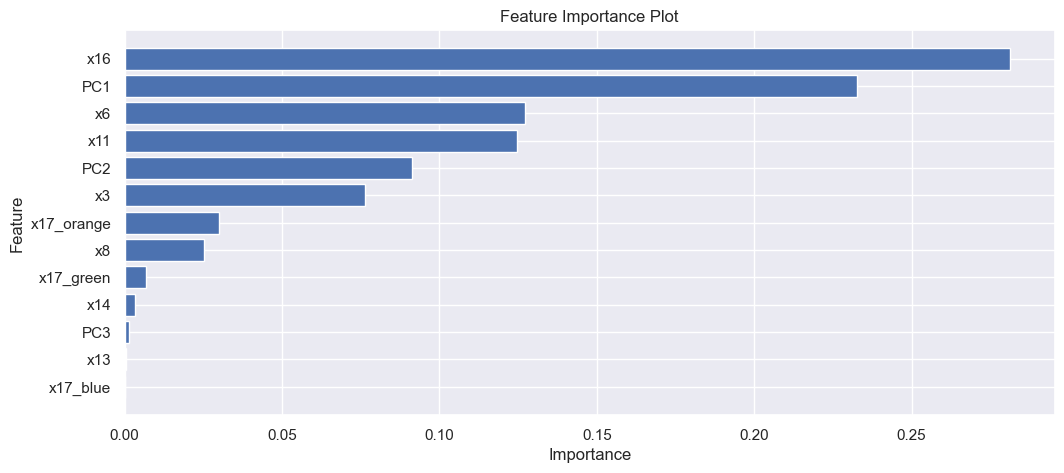

In [29]:
##### Ensemple Model Feature Importance 
### feature importance 
importances = model_pipeline.named_steps['regressor'].feature_importances_
### feature names 
ohe_categories = model_pipeline.named_steps['preprocessor'].named_transformers_['categorical'].get_feature_names_out()
feature_names = numerical_features + list(ohe_categories)

feature_importance_df = pd.DataFrame({'feature':feature_names,'importance':importances}).sort_values(by='importance', key=abs)

plt.figure(figsize=(12, 5))
plt.barh(feature_importance_df.feature, feature_importance_df.importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show();